# Allocate Benchmarks

In [7]:
# select measurement file
file_name = "../output/2024-08-06 16-43-44 new2.json"

# select style options
grey_fill_between = False

if grey_fill_between:
    fill_between_args = {"color": "grey"}
else:
    fill_between_args = {}

In [8]:
# parse data
import json

with open(file_name) as file:
    raw_data = json.load(file)

In [9]:
from util.convert import convert_data
from IPython.core.display import HTML

# filter and convert data
deallocate_min = convert_data(raw_data, "deallocate_min", ["mean", "min", "max", "options.object_size", "machine_name", "cold_start", "repetitions"])
deallocate_max = convert_data(raw_data, "deallocate_max", ["mean", "min", "max", "options.object_size", "machine_name", "cold_start", "repetitions"])
deallocate_case1 = convert_data(raw_data, "deallocate_case_1", ["mean", "min", "max", "options.object_size", "machine_name", "cold_start", "repetitions"])

display(HTML("<b>MIN Data:</b>"))
display(deallocate_min.head())
display(HTML("<b>MAX Data:</b>"))
display(deallocate_max.head())
display(HTML("<b>Case 1 Data:</b>"))
display(deallocate_case1.head())

,mean,min,max,options.object_size,machine_name,cold_start,repetitions,ticks_per_ms
0,19048.0,19048,19048,0,esp32c3,5,5,16000
1,19049.0,19049,19049,32,esp32c3,5,5,16000
2,19049.0,19049,19049,64,esp32c3,5,5,16000
3,19049.0,19049,19049,96,esp32c3,5,5,16000
4,19049.0,19049,19049,128,esp32c3,5,5,16000


,mean,min,max,options.object_size,machine_name,cold_start,repetitions,ticks_per_ms
0,960207.0,960207,960207,0,esp32c3,5,5,16000
1,832205.0,832205,832205,32,esp32c3,5,5,16000
2,792527.0,792527,792527,64,esp32c3,5,5,16000
3,815931.0,815931,815931,96,esp32c3,5,5,16000
4,835049.0,835049,835049,128,esp32c3,5,5,16000


,mean,min,max,options.object_size,machine_name,cold_start,repetitions,ticks_per_ms
0,213654.0,213654,213654,0,esp32c3,5,5,16000
1,101655.0,101655,101655,32,esp32c3,5,5,16000
2,67049.0,67049,67049,64,esp32c3,5,5,16000
3,88476.0,88476,88476,96,esp32c3,5,5,16000
4,115050.0,115050,115050,128,esp32c3,5,5,16000


In [10]:

from util.convert import get_storage_measurement
from IPython.core.display import HTML

(storage_read, storage_write) = get_storage_measurement(raw_data, deallocate_max["options.object_size"].max())

display(HTML("<b>READ Data:</b>"))
display(storage_read.head())
display(HTML("<b>WRITE Data:</b>"))
display(storage_write.head())

,mean,min,max,options.object_size,machine_name,cold_start,repetitions,ticks_per_ms
0,2637.0,2637,2637,0,esp32c3,5,5,16000
1,23536.2,23512,23633,32,esp32c3,5,5,16000
2,48354.0,48354,48354,64,esp32c3,5,5,16000
3,69229.0,69229,69229,96,esp32c3,5,5,16000
4,96354.0,96354,96354,128,esp32c3,5,5,16000


,mean,min,max,options.object_size,machine_name,cold_start,repetitions,ticks_per_ms
0,3910.0,3910,3910,0,esp32c3,5,5,16000
1,32001.0,32001,32001,32,esp32c3,5,5,16000
2,48189.0,48189,48189,64,esp32c3,5,5,16000
3,68979.0,68979,68979,96,esp32c3,5,5,16000
4,96189.0,96189,96189,128,esp32c3,5,5,16000


# Final Plot

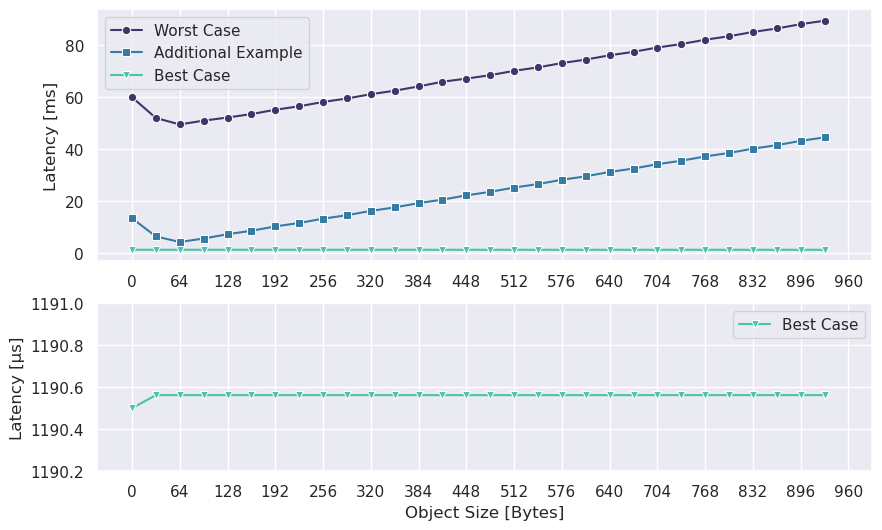

In [11]:
from util.plot import set_gird, save_plot, set_theme
from util.convert import scale_data
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

set_theme()

fig = plt.figure(1)
fig.set_figheight(6)
fig.set_figwidth(10)

gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[1.5, 1])

ax = plt.subplot(gs[0])

unit = "ms"

if len(deallocate_max) != 0:
    deallocate_max_scaled = scale_data(deallocate_max, unit)
    sns.lineplot(ax=ax, x=deallocate_max_scaled["options.object_size"], y=deallocate_max_scaled["mean"], label="Worst Case", markers=["o"], marker="o")
    ax.fill_between(deallocate_max_scaled["options.object_size"], deallocate_max_scaled["min"], deallocate_max_scaled["max"], alpha=0.2, **fill_between_args)


if len(deallocate_case1) != 0:
    deallocate_case1_scaled = scale_data(deallocate_case1, unit)
    sns.lineplot(ax=ax, x=deallocate_case1_scaled["options.object_size"], y=deallocate_case1_scaled["mean"], label="Additional Example", markers=["o"], marker="s")
    ax.fill_between(deallocate_case1_scaled["options.object_size"], deallocate_case1_scaled["min"], deallocate_case1_scaled["max"], alpha=0.2, **fill_between_args)


if len(deallocate_min) != 0:
    deallocate_min_scaled = scale_data(deallocate_min, unit)
    sns.lineplot(ax=ax, x=deallocate_min_scaled["options.object_size"], y=deallocate_min_scaled["mean"], label="Best Case", markers=["o"], marker="v")
    ax.fill_between(deallocate_min_scaled["options.object_size"], deallocate_min_scaled["min"], deallocate_min_scaled["max"], alpha=0.2, **fill_between_args)

set_gird(64, max(deallocate_min["options.object_size"].max(), deallocate_max["options.object_size"].max()), ax)

ax.set_xlabel(None)
ax.set_ylabel(f"Latency [{unit}]")

set_theme(3, 2)

ax = plt.subplot(gs[1])

unit = "µs"

# if len(deallocate_max) != 0:
#     deallocate_max_scaled = scale_data(deallocate_max, unit)
#     sns.lineplot(ax=ax, x=deallocate_max_scaled["options.object_size"], y=deallocate_max_scaled["mean"], label="Worst Case", markers=["o"], marker="o")
#     ax.fill_between(deallocate_max_scaled["options.object_size"], deallocate_max_scaled["min"], deallocate_max_scaled["max"], alpha=0.2, **fill_between_args)


# if len(deallocate_case1) != 0:
#     deallocate_case1_scaled = scale_data(deallocate_case1, unit)
#     sns.lineplot(ax=ax, x=deallocate_case1_scaled["options.object_size"], y=deallocate_case1_scaled["mean"], label="Additional Example", markers=["o"], marker="s")
#     ax.fill_between(deallocate_case1_scaled["options.object_size"], deallocate_case1_scaled["min"], deallocate_case1_scaled["max"], alpha=0.2, **fill_between_args)


if len(deallocate_min) != 0:
    deallocate_min_scaled = scale_data(deallocate_min, unit)
    sns.lineplot(ax=ax, x=deallocate_min_scaled["options.object_size"], y=deallocate_min_scaled["mean"], label="Best Case", markers=["o"], marker="v")
    ax.fill_between(deallocate_min_scaled["options.object_size"], deallocate_min_scaled["min"], deallocate_min_scaled["max"], alpha=0.2, **fill_between_args)

set_gird(64, max(deallocate_min["options.object_size"].max(), deallocate_max["options.object_size"].max()), ax)

ax.set_xlabel("Object Size [Bytes]")
ax.set_ylabel(f"Latency [{unit}]")
ax.set_ylim(bottom=1190.2, top=1191)


save_plot("deallocate")